# Imports

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Load the data

In [2]:
data_x = pd.read_csv('x_train_sncf.csv')
data_x.head()

,date,station,job,ferie,vacances
0,2015-01-01,1J7,1,1,1
1,2015-01-01,O2O,1,1,1
2,2015-01-01,8QR,1,1,1
3,2015-01-01,UMC,1,1,1
4,2015-01-01,FK3,1,1,1


In [3]:
# recreate index variable from y_train in x_train

data_x['index'] = data_x['date'].str.cat(data_x['station'], sep='_')
data_x.head()

,date,station,job,ferie,vacances,index
0,2015-01-01,1J7,1,1,1,2015-01-01_1J7
1,2015-01-01,O2O,1,1,1,2015-01-01_O2O
2,2015-01-01,8QR,1,1,1,2015-01-01_8QR
3,2015-01-01,UMC,1,1,1,2015-01-01_UMC
4,2015-01-01,FK3,1,1,1,2015-01-01_FK3


In [4]:
data_x.shape

(1229863, 6)

In [5]:
data_y = pd.read_csv('y_train_sncf.csv')
data_y.head()

,index,y
0,2015-01-01_1J7,7
1,2015-01-01_O2O,0
2,2015-01-01_8QR,9
3,2015-01-01_UMC,9
4,2015-01-01_FK3,28


In [7]:
data_y.shape

(1229863, 2)

In [18]:
data = pd.merge(data_x, data_y, on='index')
data = data[['date', 'station', 'index', 'job', 'ferie', 'vacances', 'y']] # reorered columns
data.head()

,date,station,index,job,ferie,vacances,y
0,2015-01-01,1J7,2015-01-01_1J7,1,1,1,7
1,2015-01-01,O2O,2015-01-01_O2O,1,1,1,0
2,2015-01-01,8QR,2015-01-01_8QR,1,1,1,9
3,2015-01-01,UMC,2015-01-01_UMC,1,1,1,9
4,2015-01-01,FK3,2015-01-01_FK3,1,1,1,28


# Data exploration

# List of validations per station

In [21]:
y_array = data.groupby('station')['y'].apply(np.array).to_dict()

print(len(y_array))

439


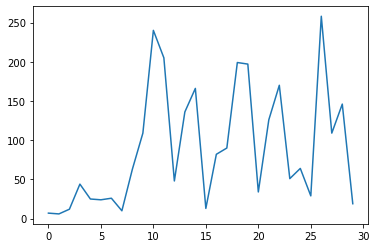

In [26]:
y_array['1J7']

plt.plot(y_array['1J7'][:30])

In [9]:
X_train = data[['job', 'ferie', 'vacances']]
y_train = data['y']

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_val)

# compute the MAPE

def mean_absolute_percentage_error(y_true, y_pred, eps=1e-2):
    return np.mean(np.abs((y_true+eps - y_pred+eps) / (y_true+eps))) * 100

MAPE = mean_absolute_percentage_error(y_val, y_pred)
print(f"MAPE: {MAPE:.2f}%")


MAPE: 151693.06%


In [10]:
model = RandomForestRegressor(n_estimators=50, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_val)

MAPE = mean_absolute_percentage_error(y_val, y_pred)
print(f"MAPE: {MAPE:.2f}%")

MAPE: 147327.84%
